# EDA - Pima Indian Diabetes

##### Sudarshan Vaidya

This is my first try at Explorative Data Analysis 

Data: Pima-Indian-Diabetes Dataset.

I have tried to explore the distributions, correlations, outliers, missing values,
Univariate, Bivariate and Multivariate analysis with multitude of plots along with 
real world interpretation for each plot. 

High level steps:  
1. Load dataset
2. Understand structure of dataset
3. Plot various graphs to explore dataset
4. Use descriptive statistics elements to describe the dataset
5. Find relationship between various attributes
6. Summarize insights from the dataset


## Import  packages 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline 

## Dataset attribute information
 1. Number of times pregnant 
 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
 3. Diastolic blood pressure (mm Hg) 
 4. Triceps skin fold thickness (mm) 
 5. 2-Hour serum insulin (mu U/ml) 
 6. Body mass index (weight in kg/(height in m)^2) 
 7. Diabetes pedigree function 
 8. Age (years) 
 9. Class variable (0 or 1)

## Dataset loading and basic analysis 

In [2]:
dia = pd.read_csv("diabetes.csv")

##### A quick look at the data set, columns and values using head()

In [3]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Check dimensions of the data set in terms of rows and columns using shape and size

In [4]:
print(dia.shape)

(768, 9)


In [5]:
print(dia.size)

6912


##### Explore the data set in terms of its columns, null values, data types, memory etc. using info()

In [6]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### Data set has no null values for any of its columns, as all columns have 768 non-null values which is equal to the total count of rows. 

##### Explore the continuous variables in terms of their range and basic statistics using describe() 

In [7]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Univariate Analysis 

##### Get overall idea of the distribution of all columns using hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009A6A0B8>,
      dtype=object)

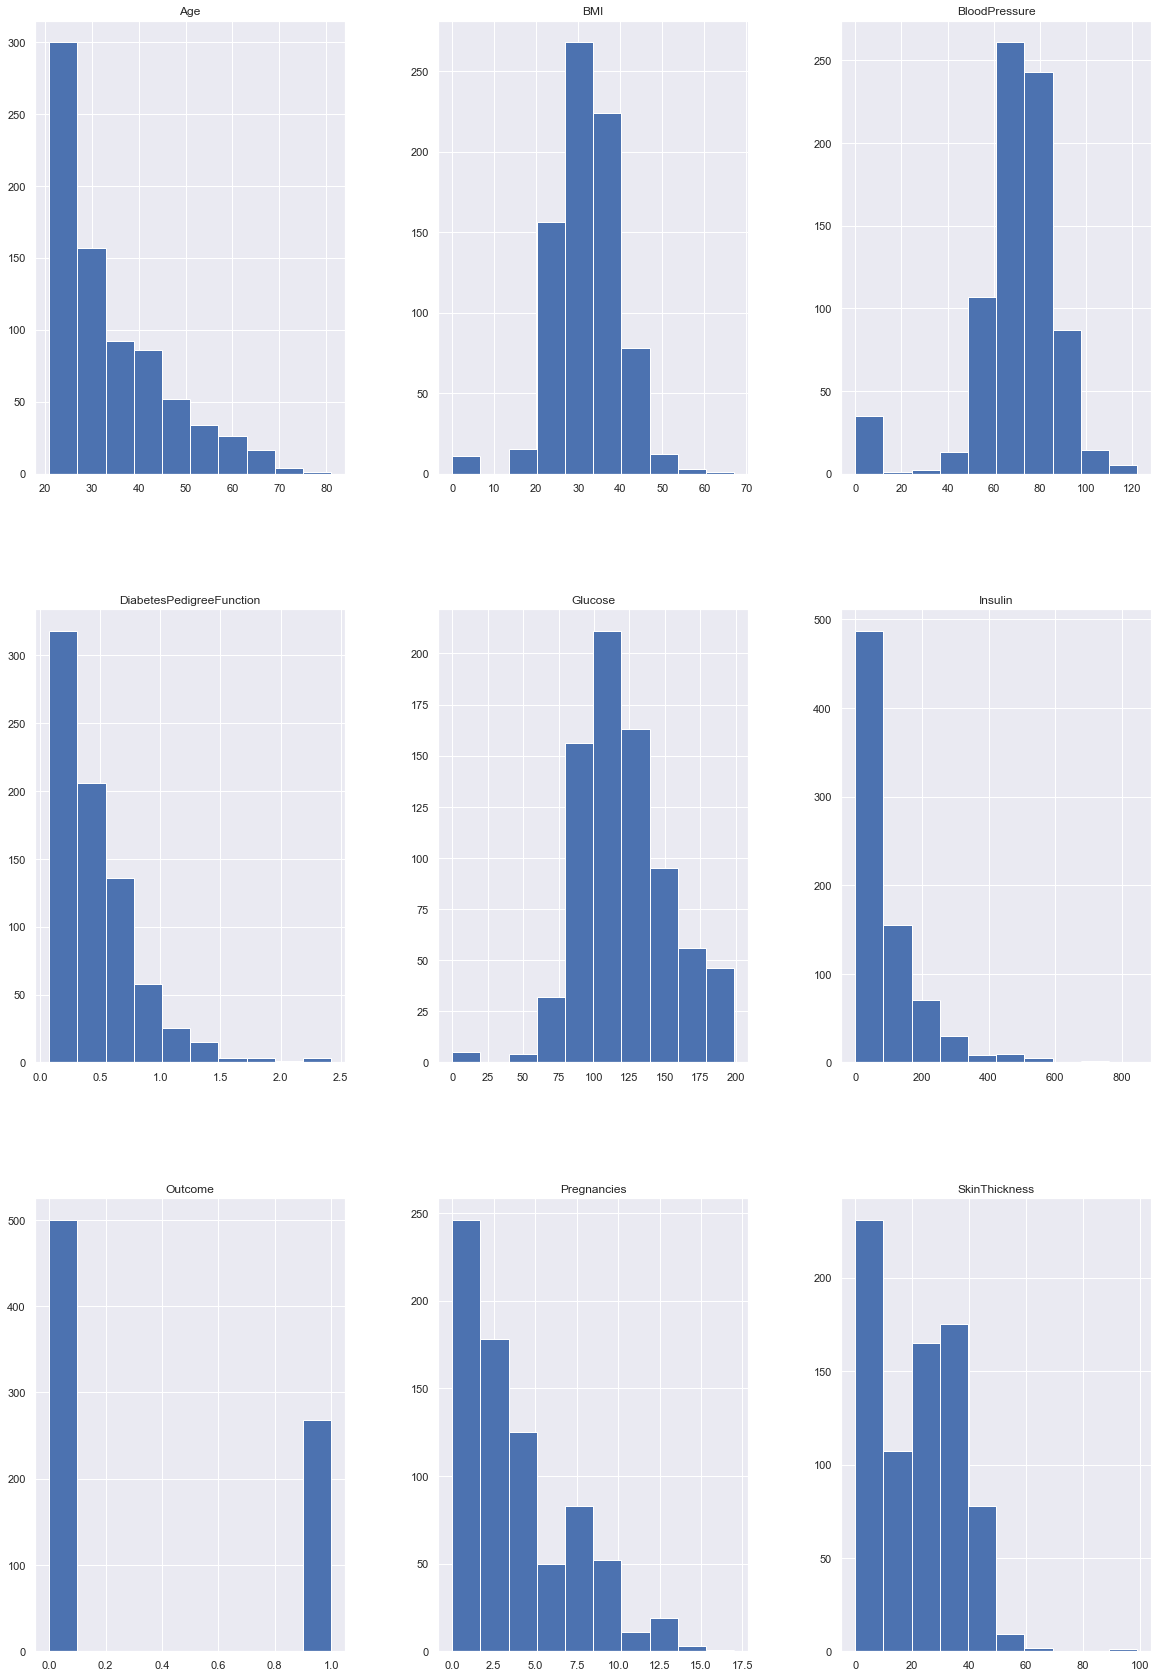

In [8]:
dia.hist(figsize=(20,30))

##### Get getails of distribution of individual attributes using distplot() and boxplot()

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


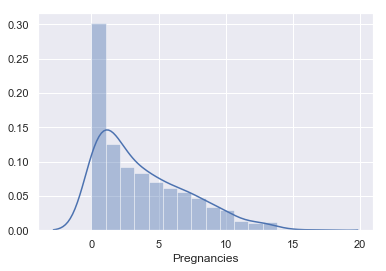

In [9]:
sns.distplot(dia['Pregnancies'])

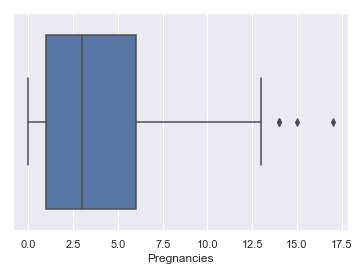

In [10]:
sns.boxplot(dia['Pregnancies'])

##### Pregnancies Inference:
1. Data is right skewed indicating there are lesser instances of higher number of pregnancies 
than lower number of pregnancies. This is in line with general observation. 
2. There are several instances of zero Pregnancies observed. However, they can be accepted as such
because this is quite possible. 
3. There are few outliers on the higher side, but they are very rare, and can be considered normal. 

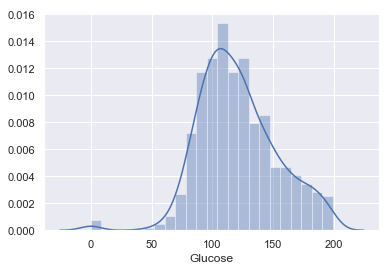

In [11]:
sns.distplot(dia['Glucose'])

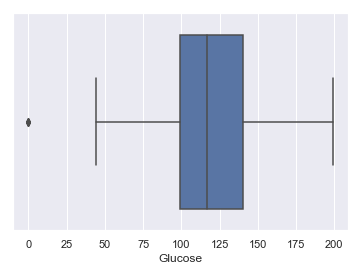

In [12]:
sns.boxplot(dia['Glucose'])

##### Glucose Inference:
    1. Glucose distribution is normal, with a slight right skew. 
    2. There are few zero values, which is not possible in real world. 
    3. The zero values will have to be taken care of. 

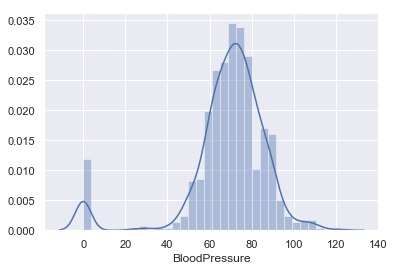

In [13]:
sns.distplot(dia['BloodPressure'])

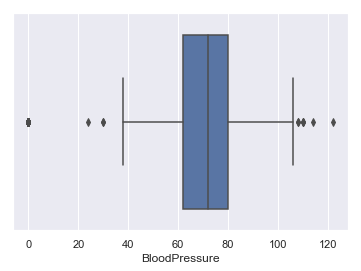

In [14]:
sns.boxplot(dia['BloodPressure'])

##### BloodPressure Inference:
    1. There are two peaks in distribution plot due to presence of large number of zero values. 
    2. Zero values are not possible in the real world. These will have to be normalized. 
    3. Few diastolic blood pressure (mm Hg) below 40 are present. This is considered dangerously low, 
    but theoretically not impossible. So such values will be used as is.
    4. Apart from the zero values, the distribution of non zero values is mostly normal. 
    5. Some higher outlier values are present, i.e. diastolic blood pressure (mm Hg) above 100. 
    These are dangerously high, but theoretically not impossible. So such values will be used as is. 

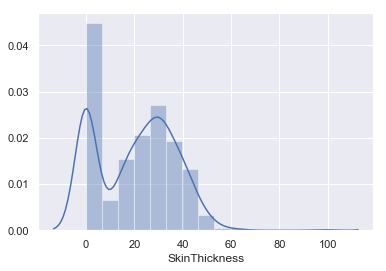

In [15]:
sns.distplot(dia['SkinThickness'])

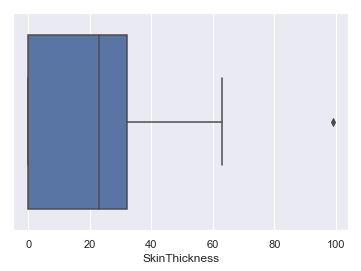

In [16]:
sns.boxplot(dia['SkinThickness'])

##### SkinThickness Inference:
    1. There are two peaks in distribution plot due to presence of very large number of zero values. 
    2. Zero values are not possible in the real world. These will have to be normalized. 
    3. Apart from the zero values, the distribution of non zero values is mostly normal. 
    4. There is one outlier at value 100, which looks abnormal. 

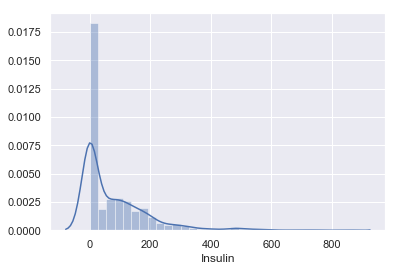

In [17]:
sns.distplot(dia['Insulin'])

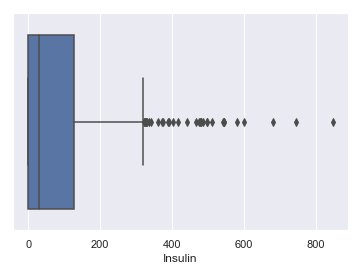

In [18]:
sns.boxplot(dia['Insulin'])

##### Insulin Inference: 
    1. There is one large peak in distribution plot due to presence of abnormally large number of zero values. 
    2. Zero values do not seem possible in the real world. These will have to be normalized. 
    3. Apart from the zero values, the distribution of non zero values looks right skewed. 
    4. There are lot of higher side outliers.

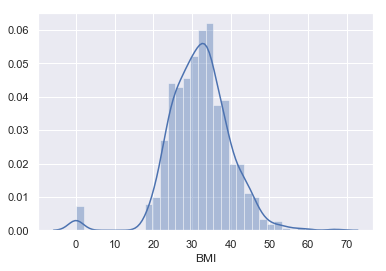

In [19]:
sns.distplot(dia['BMI'])

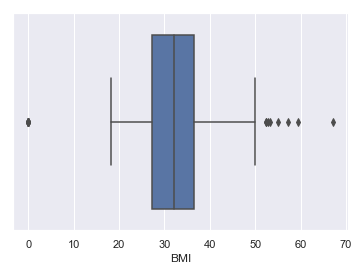

In [20]:
sns.boxplot(dia['BMI'])

##### BMI Inference:
    1. There are two peaks in distribution plot due to presence of some zero values. 
    2. Zero values are not possible in the real world. These will have to be normalized. 
    3. Apart from the zero values, the distribution of non zero values is mostly normal with a slight right skew.     
    4. There are some higher outliers above 50, which look abnormal (morbidly obsese). 

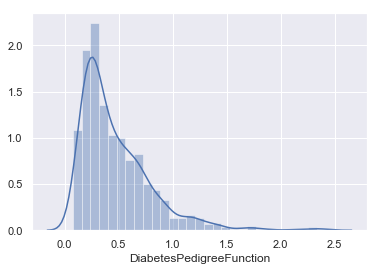

In [21]:
sns.distplot(dia['DiabetesPedigreeFunction'])

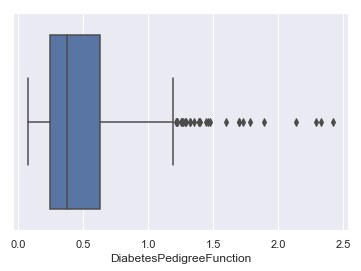

In [22]:
sns.boxplot(dia['DiabetesPedigreeFunction'])

##### DiabetesPedigreeFunction Inference:
    1. The distribution looks mostly normal with slight right skew. 
    2. There are high outliers indicating high tendency of diabetes. 

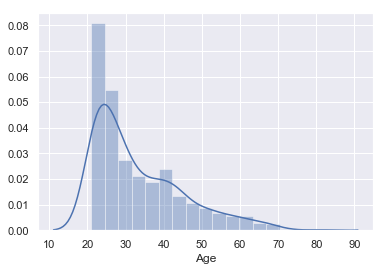

In [23]:
sns.distplot(dia['Age'])

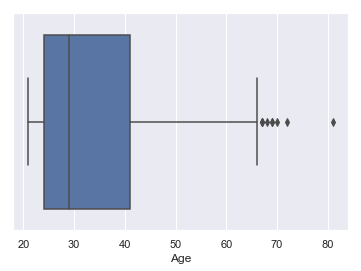

In [24]:
sns.boxplot(dia['Age'])

##### Age Inference:
    1. Age distribution looks normal with respect to real population. 
    2. There are no values less 21 years. 

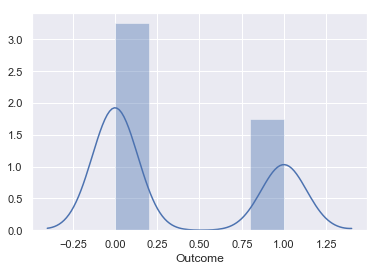

In [25]:
sns.distplot(dia['Outcome'])

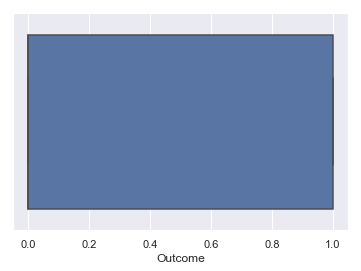

In [26]:
sns.boxplot(dia['Outcome'])

##### Outcome Inference:
    1. Although the data type is int64, this attribute has only two values 0 and 1. 
    2. Nearly one-third of the sample is positive for diabetes. 
    3. This field can be converted to a categorical value to have better visualization using hue.

## Zero Values analysis 

##### There are no null values in the dataset as can be seen from the dia.info() output, 
but there are some values in below attributes that are zero: 

1. Pregnancies - zero makes sense in real life 
2. Glucose - zero has no sense in real life 
3. BloodPressure - zero has no sense in real life 
4. SkinThickness - zero has no sense in real life 
5. Insulin - zero has no sense in real life 
6. BMI - zero has no sense in real life 

Since zero values in these attributes make no sense in real life, except for 'Pregnancies', which can be zero, 
these zero values may be excluded. 
However, this decision of dropping zero values can be taken after exploring more on count of these zero values.
 

##### Count of zero values in Pregnancies 

In [27]:
dia[dia['Pregnancies']==0].count()

Pregnancies                 111
Glucose                     111
BloodPressure               111
SkinThickness               111
Insulin                     111
BMI                         111
DiabetesPedigreeFunction    111
Age                         111
Outcome                     111
dtype: int64

##### Count of zero values in Glucose

In [28]:
dia[dia['Glucose']==0].count()

Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     5
dtype: int64

##### Count of zero values in BloodPressure 

In [29]:
dia[dia['BloodPressure']==0].count()

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

##### Count of zero values in SkinThickness 

In [30]:
dia[dia['SkinThickness']==0].count()

Pregnancies                 227
Glucose                     227
BloodPressure               227
SkinThickness               227
Insulin                     227
BMI                         227
DiabetesPedigreeFunction    227
Age                         227
Outcome                     227
dtype: int64

##### Count of zero values in Insulin 

In [31]:
dia[dia['Insulin']==0].count()

Pregnancies                 374
Glucose                     374
BloodPressure               374
SkinThickness               374
Insulin                     374
BMI                         374
DiabetesPedigreeFunction    374
Age                         374
Outcome                     374
dtype: int64

##### Count of zero values in BMI 

In [32]:
dia[dia['BMI']==0].count()

Pregnancies                 11
Glucose                     11
BloodPressure               11
SkinThickness               11
Insulin                     11
BMI                         11
DiabetesPedigreeFunction    11
Age                         11
Outcome                     11
dtype: int64

##### Count of zero values in SkinThickness OR Insulin 

In [33]:
dia[(dia['SkinThickness']==0) | (dia['Insulin']==0)].count()

Pregnancies                 374
Glucose                     374
BloodPressure               374
SkinThickness               374
Insulin                     374
BMI                         374
DiabetesPedigreeFunction    374
Age                         374
Outcome                     374
dtype: int64

##### Count of zero values in SkinThickness AND Insulin 

In [34]:
dia[(dia['SkinThickness']==0) & (dia['Insulin']==0)].count()

Pregnancies                 227
Glucose                     227
BloodPressure               227
SkinThickness               227
Insulin                     227
BMI                         227
DiabetesPedigreeFunction    227
Age                         227
Outcome                     227
dtype: int64

##### Count of common zero values in Glucose, BloodPressure and BMI 

In [35]:
dia[(dia['Glucose']==0) & (dia['BloodPressure']==0) & (dia['BMI']==0)].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Conclusion of Zero values analsysis - Part 1

##### Analysis of Zero value counts: 

1. Pregnancies - zero values count = 111, but no issues with zero values 
2. Glucose - zero values count = 5 
3. BloodPressure - zero values count = 35 
4. SkinThickness - zero values count = 227  
5. Insulin - zero values count = 374  
6. BMI - zero values count = 11 
 
Observations: 
1. Zero values for SkinThickness and Insulin are very high, and they co-occur. 
2. Zero values for Glucose, BloodPressure and BMI are relatively low, and they rarely co-occur.  
 
Deletion of these zero values does not look feasible because:
1. Large number of rows will be deleted, valuable data will be lost. 
2. Deleted rows may contain non-zero values of other attributes, which could be useful.
 
Thus, strategy for zero values could be as follows: 
1. No action for zero values in Pregnancies.
Reason: High number, but assumed to be valid real life scenario. 
2. Do not drop rows for zero values in Glucose, BloodPressure and BMI. 
Reason: Relatively low and non co-occurring values. 
3. Do not consider SkinThickness and Insulin as predictors 
Reason: Very high and co-occuring zero values. 
 
 

## Bivariate Analysis

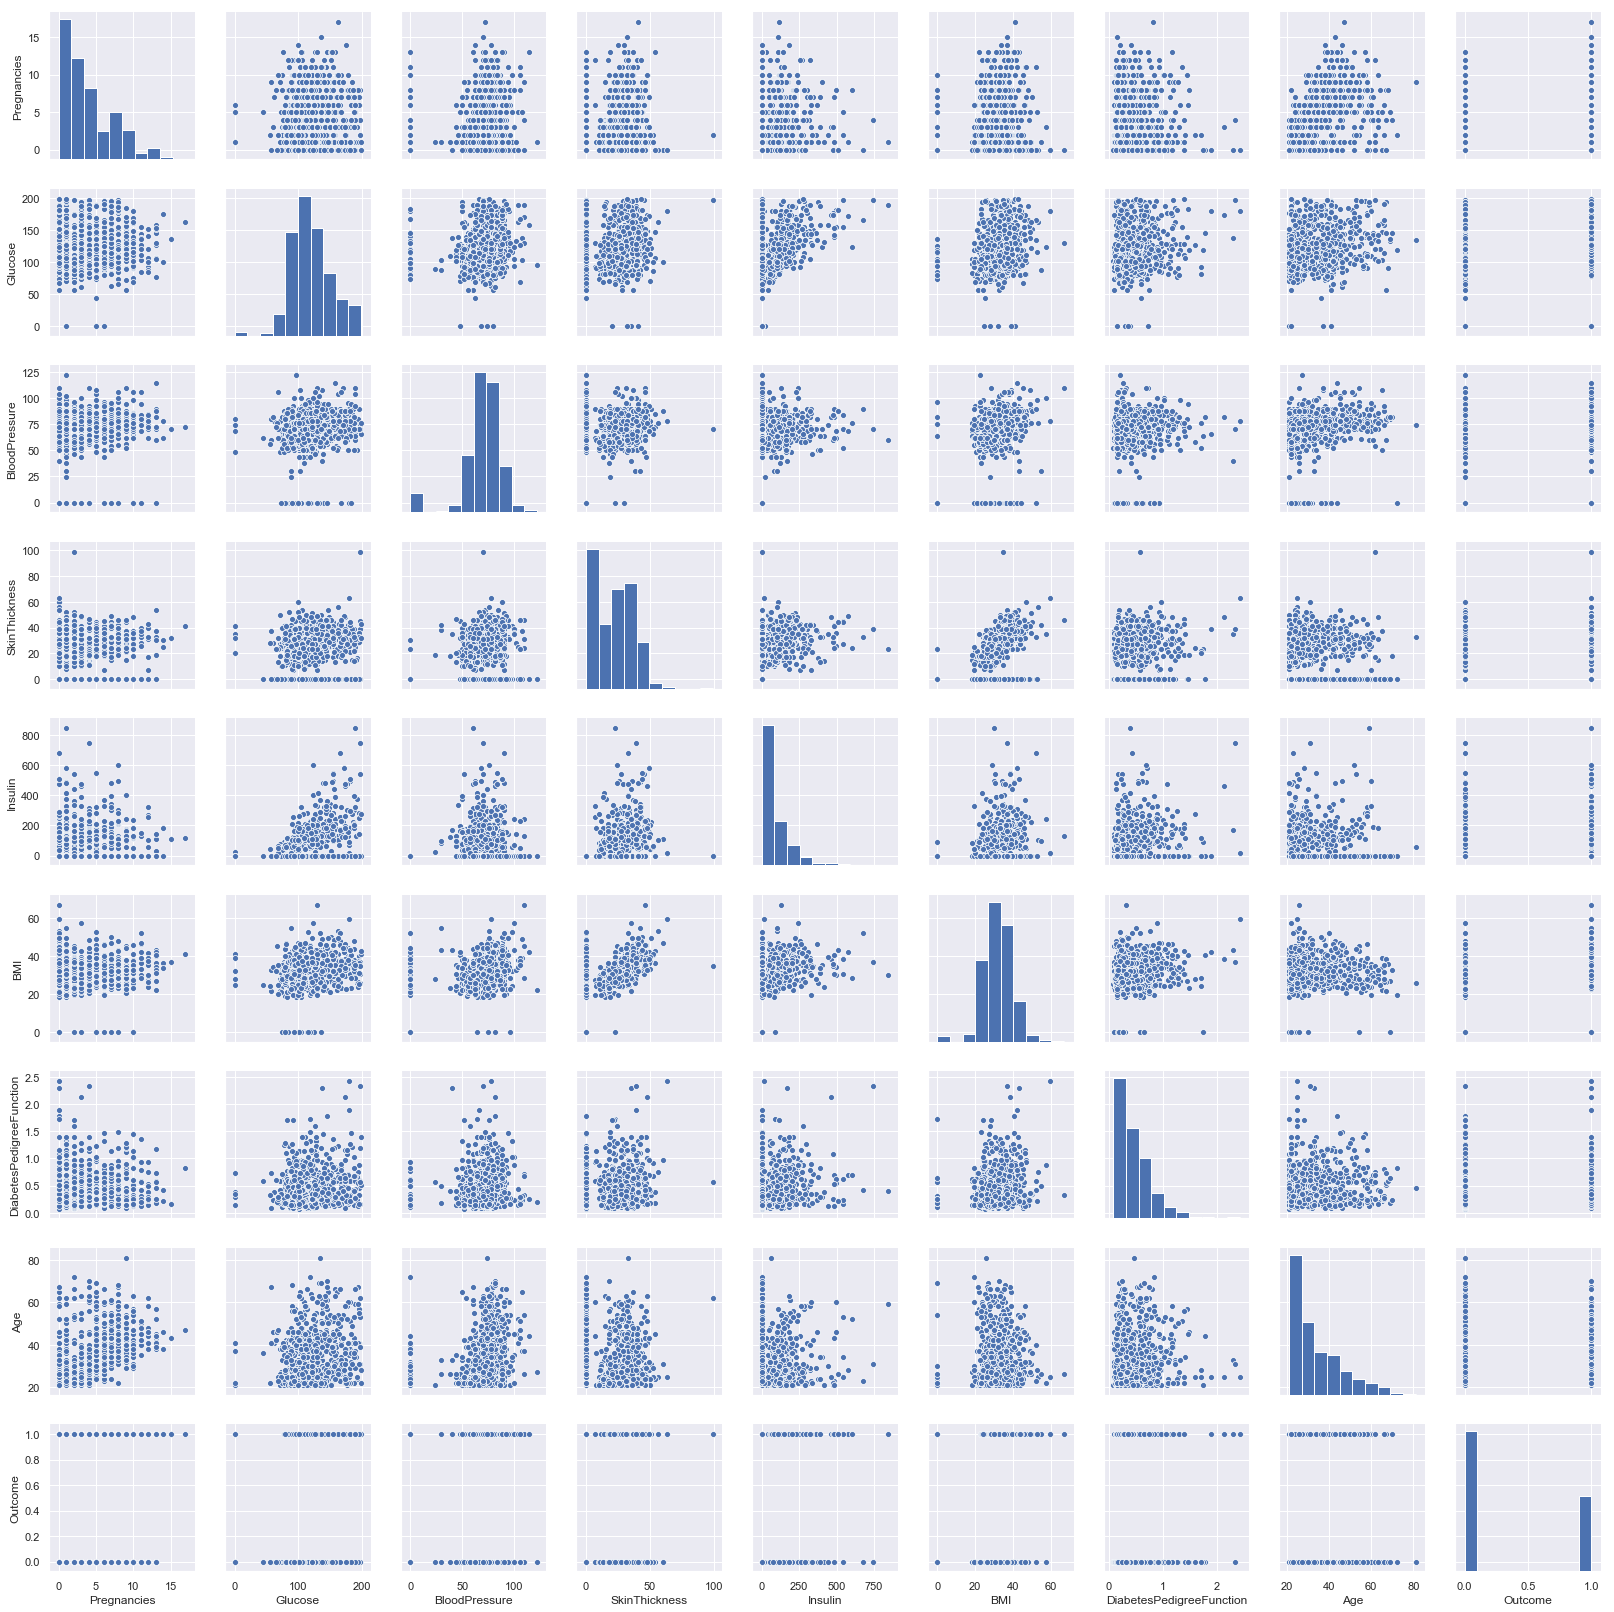

In [36]:
sns.pairplot(dia)

## Correlation Analysis

In [37]:
corr = dia.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


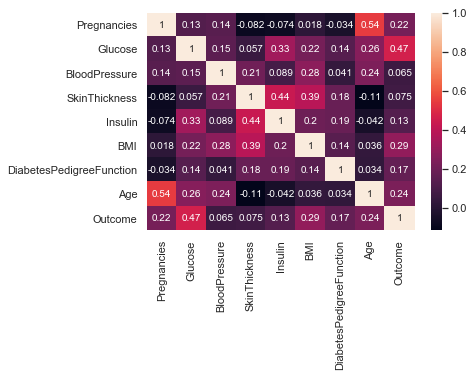

In [38]:
sns.heatmap(corr, annot=True)

## Explore replacement of zero values with mean

##### Define a different data frame for data manupulation 

In [39]:
diab = pd.read_csv("diabetes.csv")

In [40]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Find out SkinThickness mean and fill zero values 

In [41]:
diab[diab['SkinThickness']>0].mean()

Pregnancies                   3.512015
Glucose                     119.822551
BloodPressure                71.197782
SkinThickness                29.153420
Insulin                     113.282810
BMI                          32.774122
DiabetesPedigreeFunction      0.504850
Age                          31.558226
Outcome                       0.332717
dtype: float64

In [42]:
def fill_mean_SkinThickness(a):
        if a==0:
            return 29.153420
        else:
            return a

In [43]:
SkinThickness_new = diab['SkinThickness'].apply(fill_mean_SkinThickness)

In [44]:
diab['SkinThickness'] = SkinThickness_new

##### Find out Insulin mean and fill zero values 

In [45]:
diab[diab['Insulin']>0].mean()

Pregnancies                   3.286802
Glucose                     122.304569
BloodPressure                70.654822
SkinThickness                29.106599
Insulin                     155.548223
BMI                          32.988579
DiabetesPedigreeFunction      0.525543
Age                          30.814721
Outcome                       0.329949
dtype: float64

In [46]:
def fill_mean_Insulin(a):
        if a==0:
            return 155.548223
        else:
            return a

In [47]:
Insulin_new = diab['Insulin'].apply(fill_mean_Insulin)

In [48]:
diab['Insulin'] = Insulin_new

## Create a new Categorical Attribute for Outcome - for effective analysis 

In [49]:
def Categorical_Outcome(a):
        if a==0:
            return 'Non-Diabetic'
        else:
            return 'Diabetic'

In [50]:
diab['Diabetes'] = diab['Outcome'].apply(Categorical_Outcome)

In [51]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1,Diabetic
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0,Non-Diabetic
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1,Diabetic
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0,Non-Diabetic
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1,Diabetic


## Comparative Analysis of Original and Manupulated data frames 

##### Compare all attributes with each other using pairplot() for original and manupulated data frames 

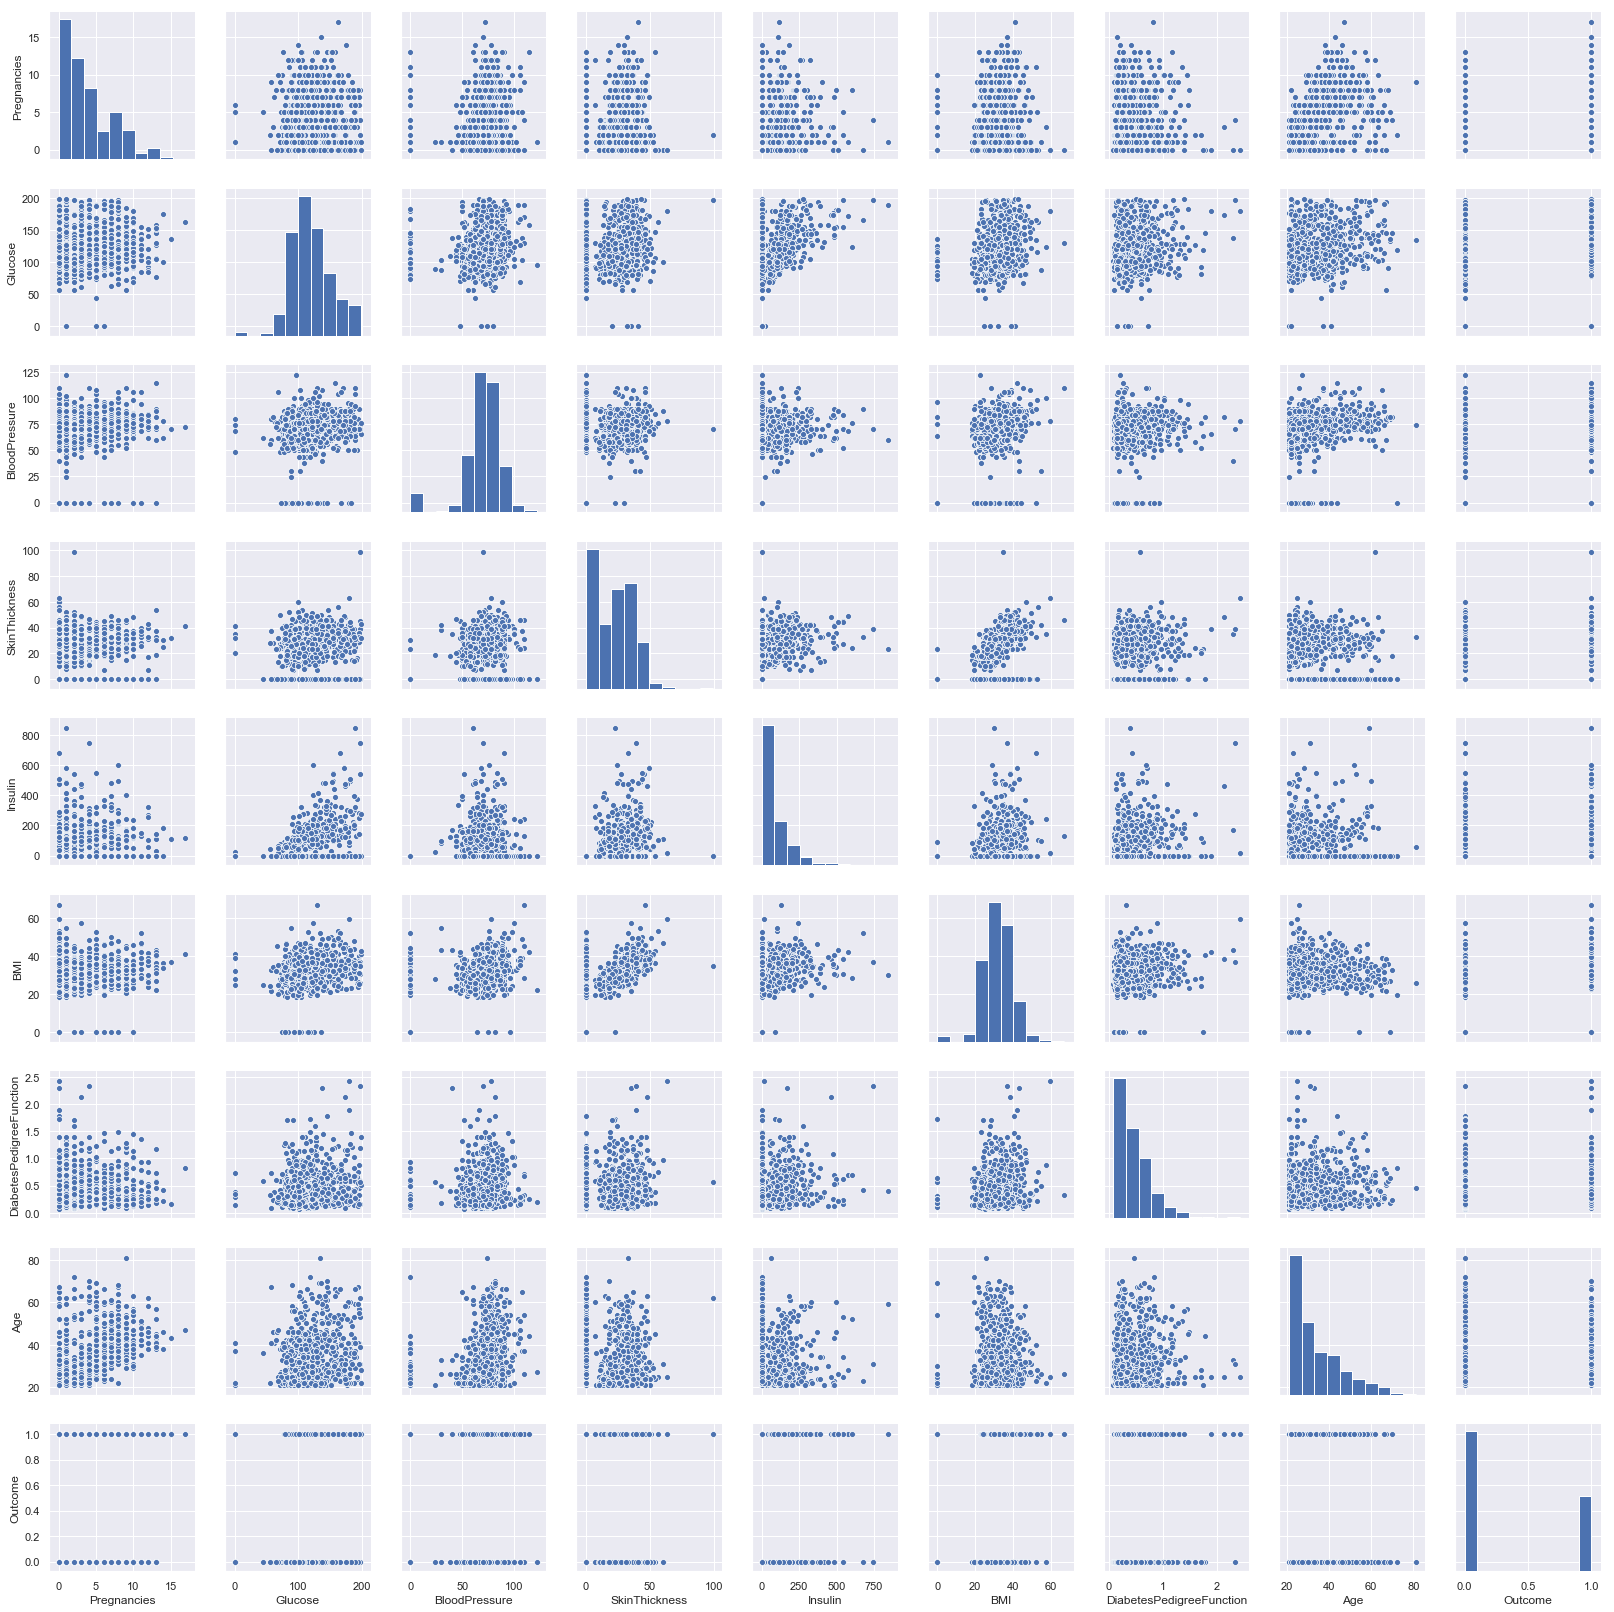

In [52]:
sns.pairplot(dia)

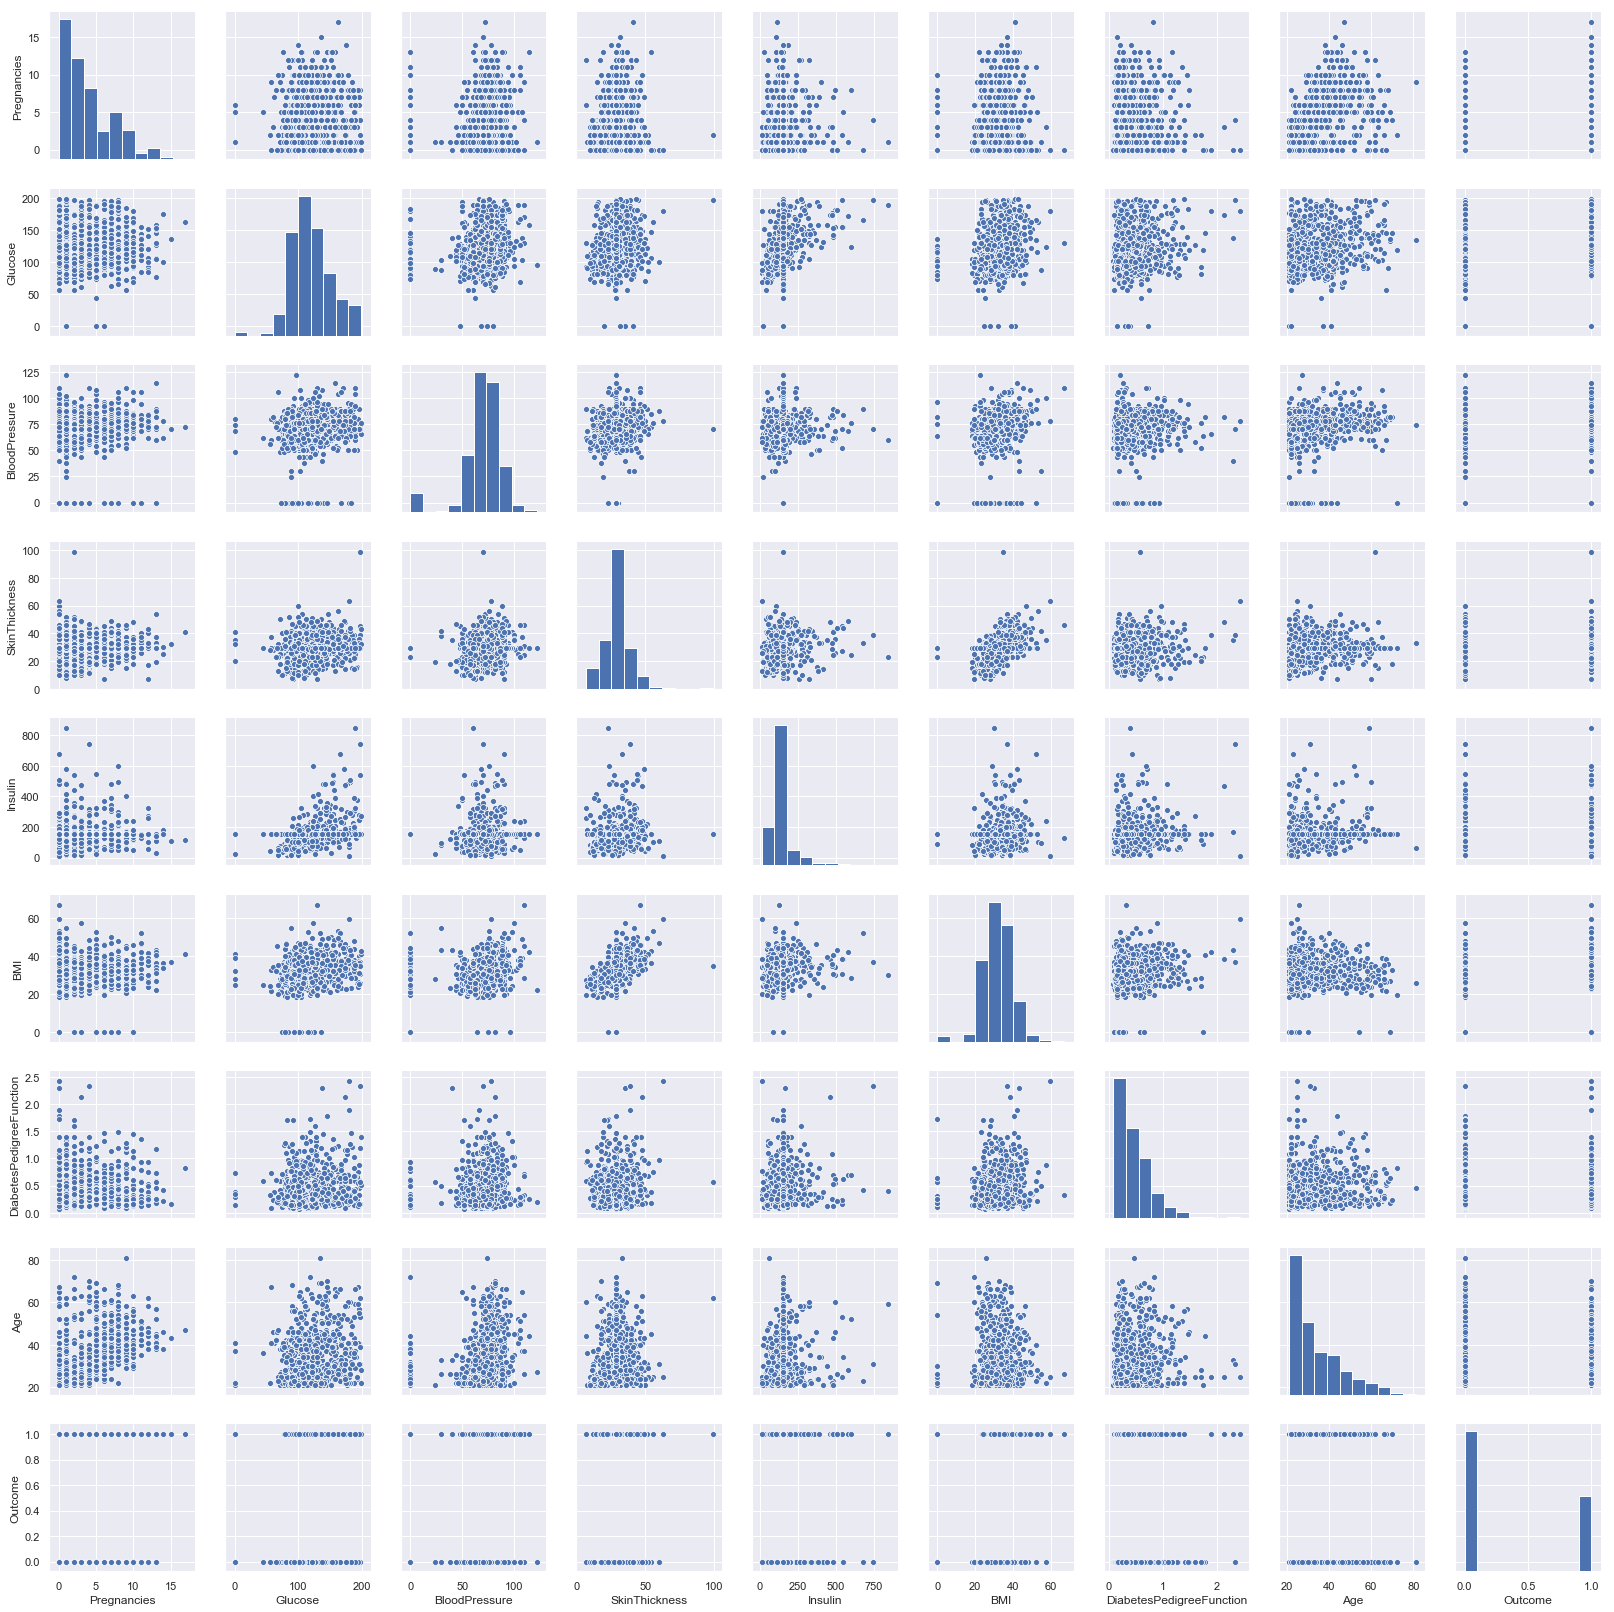

In [53]:
sns.pairplot(diab)

##### Conclusion from pairplot analysis for original and manupulated data frames:
    1. The 'noise' along the axis due to very high zero values in SkinThickness and Insulin is eliminated. 
    2. The histogram of SkinThickness and Insulin is more normal due to no zero values. 

##### Create new correlation matrix for manupulated data frame

In [54]:
corr_new = diab.corr()
corr_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.082989,0.056027,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.182455,0.407699,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.123444,0.045319,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.082989,0.182455,0.123444,1.000000,0.158139,0.480496,0.100966,0.127872,0.215299
Insulin,0.056027,0.407699,0.045319,0.158139,1.000000,0.149468,0.098634,0.136734,0.214411
BMI,0.017683,0.221071,0.281805,0.480496,0.149468,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.100966,0.098634,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.127872,0.136734,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.215299,0.214411,0.292695,0.173844,0.238356,1.000000


##### Heat Map for correlation matrix for manupulated data frame for better visualization 

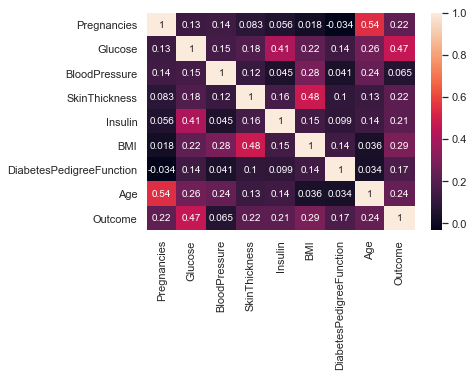

In [55]:
sns.heatmap(corr_new, annot=True)

##### Heat Map for correlation matrix for original data frame for better visualization 

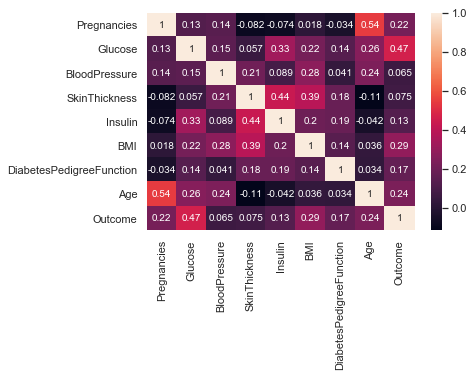

In [56]:
sns.heatmap(corr, annot=True)

##### Heat Map for "DIFFERENCE Correlation Matrix" for original and manupulated data frame 

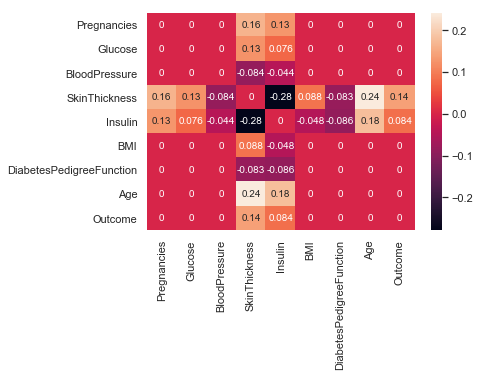

In [57]:
sns.heatmap(corr_new - corr, annot=True)

##### Inference for Heat Map for "DIFFERENCE Correlation Matrix":
    1. Correlation values of SkinThickness and Insulin vis-a-vis several attributes have generally increased
    for Pregnancies, Glucose, Age and Outcome, while it has reduced for BloodPressure and DiabetesPedigreeFunction. 
    2. Correlation values between SkinThickness and Insulin has reduced as hundereds of 'common' zero values 
    have been replaced with non-zero mean. 


## Conclusion of Zero values analsysis - Part 2

##### Analysis of Zero value counts: 

1. Pregnancies - zero values count = 111, but no issues with zero values 
2. Glucose - zero values count = 5 
3. BloodPressure - zero values count = 35 
4. SkinThickness - zero values count = 227  
5. Insulin - zero values count = 374  
6. BMI - zero values count = 11 
 
Observations: 
1. Zero values for SkinThickness and Insulin are very high, and they co-occur. 
2. Zero values for Glucose, BloodPressure and BMI are relatively low, and they rarely co-occur.  
 
Deletion of these zero values does not look feasible because:
1. Large number of rows will be deleted, valuable data will be lost. 
2. Deleted rows may contain non-zero values of other attributes, which could be useful.
 
Thus, strategy for zero values could be as follows: 
1. No action for zero values in Pregnancies.
Reason: High number, but assumed to be valid real life scenario. 
2. Do not drop rows for zero values in Glucose, BloodPressure and BMI. 
Reason: Relatively low and non co-occurring values. 
3. Replace zero values in SkinThickness and Insulin by the mean of their non-zero values  
Reason: 
a. Zero values causing distortion for SkinThickness and Insulin (seen in earlier pair plot)
has been corrected. 
b. Co-relation between SkinThickness and BMI has increased, which is logical. 
c. Co-relation between Insulin and Glucose, Pregnancies has increased, which is logical. 
 

## Bivariate attribute Analysis for Outcome

## Note: 
    The 'Outcome' was converted into a categorical variable called 'Diabetes' earlier to enable box plot 
    analysis with rest of this attributes. This is very helpful to clearly visualise and identify the change 
    in various attributes for diabetic and non-diabetic samples. 

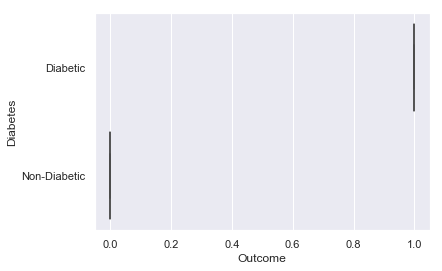

In [58]:
sns.boxplot(x="Outcome", y="Diabetes", data=diab)

##### Inference:
    There is one-to-one mappping between Outcome and Diabetes, as was intended. 

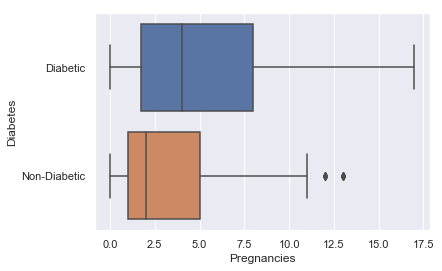

In [59]:
sns.boxplot(x="Pregnancies", y="Diabetes", data=diab)

##### Inference:
    1. There are decisively high number of Pregnancies for Diabetic samples compared to Non-Diabetic samples,
    indicating a high correlation. 
    2. There are very few high value outliers for Non-Diabetic samples. 

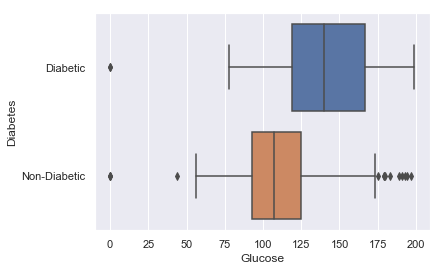

In [60]:
sns.boxplot(x="Glucose", y="Diabetes", data=diab)

##### Inference:
    1. There are distinctively high Glucose values for Diabetic samples compared to Non-Diabetic samples, 
    indicating a high correlation. 
    2. Though there are considerable high value outliers for Non-Diabetic samples. 

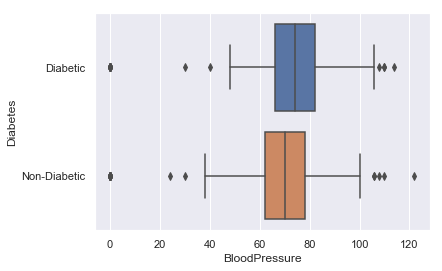

In [61]:
sns.boxplot(x="BloodPressure", y="Diabetes", data=diab)

##### Inference:
    Samples with higher BloodPressure seem to have more tendency for diabetes. 

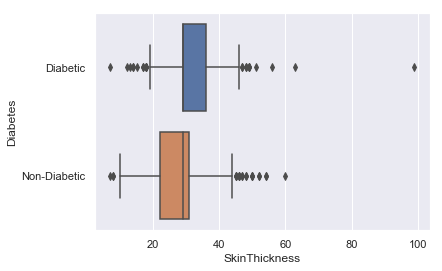

In [62]:
sns.boxplot(x="SkinThickness", y="Diabetes", data=diab)

##### Inference:
    Samples with higher SkinThickness seem to have more tendency for diabetes, though there are lot of
    counter examples in the form of low value and high value outliers. 

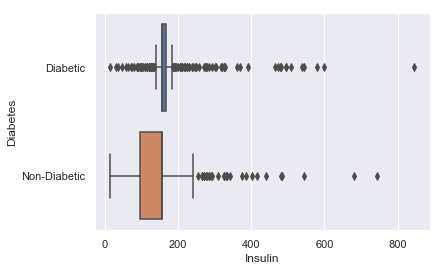

In [63]:
sns.boxplot(x="Insulin", y="Diabetes", data=diab)

##### Inference:
    1. In general, samples with higher Insulin seem to have more tendency for diabetes, though there are very high
    counter examples in the form of low value and high value outliers.
    2. Insulin fluctuation (inferred by low and high value outliers) is more pronounced for Diabetic sample than 
    the Non-Diabetic sample, which is exactly case for diabetes in real life. 

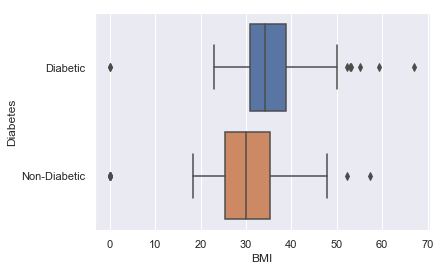

In [64]:
sns.boxplot(x="BMI", y="Diabetes", data=diab)

##### Inference:
    In general, samples with higher BMI seem to have more tendency for diabetes, though there few
    counter examples in the form of high value outliers.

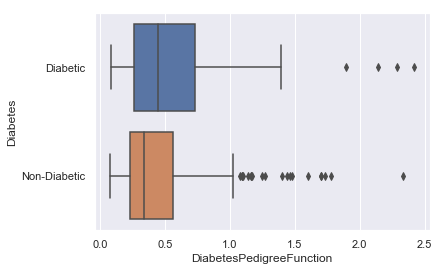

In [65]:
sns.boxplot(x="DiabetesPedigreeFunction", y="Diabetes", data=diab)

##### Inference:
    In general, samples with slightly higher DiabetesPedigreeFunction seem to have more tendency for diabetes, 
    though there are some counter examples in the form of high value outliers.

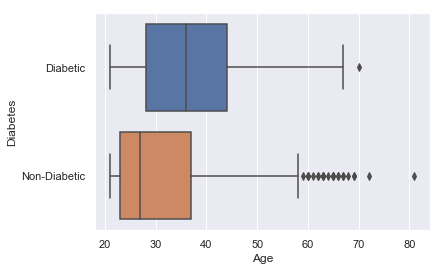

In [66]:
sns.boxplot(x="Age", y="Diabetes", data=diab)

##### Inference:
    In general, older samples (i.e. high age) seem to have more tendency for diabetes, 
    though there are several counter examples in the form of high value outliers in Non-Diabetic samples.

## Relationship between attributes with respect to Outcome - Finding out best predictors

##### Let us look at the coorelation heat map once more 

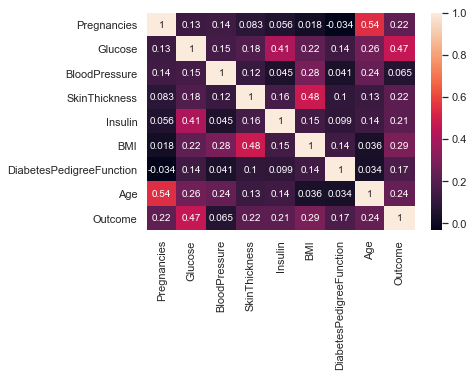

In [67]:
sns.heatmap(corr_new, annot=True)

## Inference from Correlation heat map:
    1. All correlation values are less than 0.6, which means there is relatively less correlation betwwen 
    various attributes and also the Outcome. 
    2. Top three attribute pairs with highest correlation are:
        a. Pregnancies-Age
        b. SkinThickness-BMI 
        c. Glucose-Insulin
        So, only value from these pairs can be used as predictors for the Outcome. 
    3. Outcome has positive correlation with all the attributes without any exception. 
    4. BloodPressure has least correlation with Outcome.
    5. DiabetesPedigreeFunction has a low correlation with Outcome. 

## Best Predictors for Outcome (diabetes):
        Top three attributes with highest correlation with Outcome are:
        1. Glucose (so Insulin not considered) 
        2. BMI (so SkinThickness not considered)
        3. Pregnancies (so Age not considered)
        Additionally DiabetesPedigreeFunction may also be considered, as it is independent.
    

## Validation of high correlation variables - and their impact on diabetes 

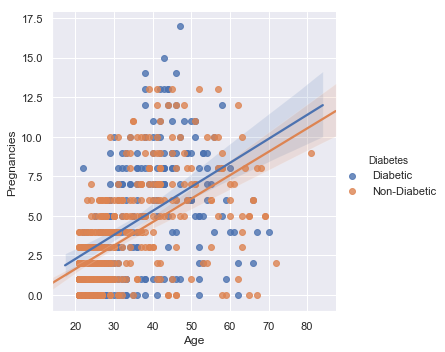

In [68]:
sns.lmplot(x='Age', y='Pregnancies', data=diab, hue='Diabetes')

##### Inference:
    Pregnancies of course increase with age (positive correlation). Additionally, Pregnancies are higher 
    for Diabetic samples (blue line). 

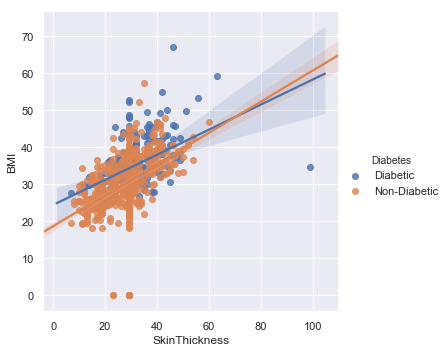

In [69]:
sns.lmplot(x='SkinThickness', y='BMI', data=diab, hue='Diabetes')

##### Inference:
    1. As expected, there seems to be a positive correlation between SkinThickness and BMI. 
    2. This correlation is slightly less for Diabetic samples (slope of blue line is less). 

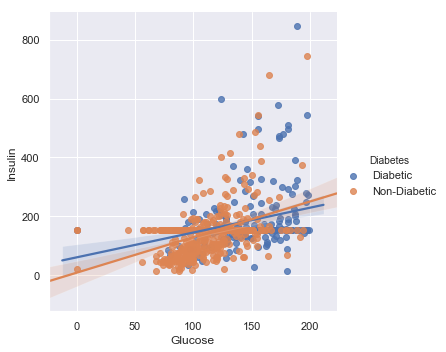

In [70]:
sns.lmplot(x='Glucose', y='Insulin', data=diab, hue='Diabetes')

##### Inference:
    1. As expected, there seems to be a positive correlation between Glucose and Insulin. 
    2. This correlation is slightly less for Diabetic samples (slope of blue line is less) - this is very much 
    the symptom of diabetes, i.e. Insulin is not able to control the blood sugar levels. 

## End of EDA 